PART 1

1. EXTRACT THE NUMBERS WHICH ARE IN YELLOW COLOURS

In [1]:
a = {"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}


In [2]:
import re
import json

In [3]:
y = json.dumps(a)
y

'{"orders": [{"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}, {"id": 8}, {"id": 9}, {"id": 10}, {"id": 11}, {"id": 648}, {"id": 649}, {"id": 650}, {"id": 651}, {"id": 652}, {"id": 653}], "errors": [{"code": 3, "message": "[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'

In [4]:
num = [i for i in re.findall("\d*",y) if i]
yellow_numbers = []
for i in num[:-2]:
    yellow_numbers.append(i)
print(yellow_numbers)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '648', '649', '650', '651', '652', '653', '3']


PART 2

1. Train a machine learning model (preferably with a neural network) that 
predicts the customer who is going to be checked in. Once done, please test 
the prediction with below test data.


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [6]:
df_train = pd.read_csv('train_data_evaluation_part_2.csv')

In [7]:
df_train.head(2)

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0


DATA CLEANING

In [8]:
df_train.isnull().mean()

Unnamed: 0              0.000000
ID                      0.000000
Nationality             0.000000
Age                     0.045362
DaysSinceCreation       0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoom             0.000000
dtype: flo

In [9]:
df_train['Age'] = df_train['Age'].fillna(df_train.Age.median())

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   82580 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

In [11]:
df_train.BookingsCheckedIn.unique()

array([ 3,  1,  0,  9,  2, 11, 12,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10,
       17, 13, 26, 23, 57, 40, 18, 14, 24, 19, 20, 34], dtype=int64)


THIS IS HAVE TO CHEKING CUSTOME WILL CHEKKED IN OR NOT SO WE WILL CONSIDER ONLY 0 AND 1 FOR BOOKING CHEKED IN

COMBINING 2-66 IN 1 CATEGORY

In [12]:
df_train['BookingsCheckedIn']=df_train.BookingsCheckedIn.replace(to_replace=[9, 3, 2, 4,  11, 12,  7,  8,  5,  6, 66, 15, 29, 25, 10, 17, 13, 26,
       23, 57, 40, 18, 14, 24, 19, 20, 34],
           value= 1)

In [13]:
df_train.BookingsCheckedIn.unique()

array([1, 0], dtype=int64)

In [14]:
df_train.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,46.0,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_train.to_csv('train_data')

In [16]:
df_train.drop(['Unnamed: 0','ID','Nationality','BookingsCanceled','BookingsNoShowed','DaysSinceFirstStay','DaysSinceLastStay'], axis = 1, inplace=True)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   82580 non-null  float64
 1   DaysSinceCreation     82580 non-null  int64  
 2   AverageLeadTime       82580 non-null  int64  
 3   LodgingRevenue        82580 non-null  float64
 4   OtherRevenue          82580 non-null  float64
 5   BookingsCheckedIn     82580 non-null  int64  
 6   PersonsNights         82580 non-null  int64  
 7   RoomNights            82580 non-null  int64  
 8   DistributionChannel   82580 non-null  object 
 9   MarketSegment         82580 non-null  object 
 10  SRHighFloor           82580 non-null  int64  
 11  SRLowFloor            82580 non-null  int64  
 12  SRAccessibleRoom      82580 non-null  int64  
 13  SRMediumFloor         82580 non-null  int64  
 14  SRBathtub             82580 non-null  int64  
 15  SRShower           

In [18]:
df_train.DistributionChannel.unique()

array(['Corporate', 'Travel Agent/Operator', 'Direct',
       'Electronic Distribution'], dtype=object)

In [19]:
df_train.MarketSegment.unique()

array(['Corporate', 'Travel Agent/Operator', 'Other', 'Direct',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [20]:
cat_cols = ['DistributionChannel', 'MarketSegment']

In [21]:
df_train[cat_cols] = df_train[cat_cols].apply(LabelEncoder().fit_transform)


In [22]:
df_train.DistributionChannel.unique()

array([0, 3, 1, 2])

In [23]:
x = df_train.drop(['BookingsCheckedIn'], axis=1)
y = df_train.BookingsCheckedIn

# MODELLING

# ANN 

In [24]:
df_train.BookingsCheckedIn.value_counts()

1    63186
0    19394
Name: BookingsCheckedIn, dtype: int64

class is imbalanced we have to balance the target variable by using smote technique

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import *

In [26]:
x_smote, y_smote = SMOTE().fit_resample(x, y)


In [27]:
x_smote.value_counts()
y_smote.value_counts()

1    63186
0    63186
Name: BookingsCheckedIn, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=0)

In [29]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [31]:
model = Sequential([
    Dense(units=20, input_dim = x_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.7),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])

In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                460       
                                                                 
 dense_1 (Dense)             (None, 24)                504       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,993
Trainable params: 1,993
Non-trainabl

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=30, epochs=5)


Epoch 1/5
2949/2949 [==============================] - 22s 5ms/step - loss: 0.1612 - accuracy: 0.9578
Epoch 2/5
2949/2949 [==============================] - 15s 5ms/step - loss: 0.0370 - accuracy: 0.9906
Epoch 3/5
2949/2949 [==============================] - 12s 4ms/step - loss: 0.0309 - accuracy: 0.9909
Epoch 4/5
2949/2949 [==============================] - 12s 4ms/step - loss: 0.0289 - accuracy: 0.9917
Epoch 5/5
2949/2949 [==============================] - 12s 4ms/step - loss: 0.0241 - accuracy: 0.9931


In [34]:
model.save('booking_hotel_chekedin.h5')

PREDICTION ON TEST DATASET

In [35]:
df_test = pd.read_csv('test_data_evaluation_part2.csv')

In [36]:
df_test.head(2)

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_test.BookingsCheckedIn.unique()

array([0, 1, 2], dtype=int64)

In [38]:
df_test['BookingsCheckedIn']=df_test.BookingsCheckedIn.replace(to_replace=[2],
           value= 1)

In [39]:
df_test.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
df_test.to_csv('test_data')

In [41]:
df_test.BookingsCheckedIn.unique()

array([0, 1], dtype=int64)

In [42]:
y_test = df_test.BookingsCheckedIn

In [43]:
df_test.drop(['Unnamed: 0','ID','Nationality', 'BookingsCheckedIn','BookingsCanceled','BookingsNoShowed','DaysSinceFirstStay','DaysSinceLastStay'], axis = 1, inplace=True)

In [44]:
df_test['Age'] = df_test['Age'].fillna(df_test.Age.median())

In [45]:
cat_cols = ['DistributionChannel', 'MarketSegment']
df_test[cat_cols] = df_test[cat_cols].apply(LabelEncoder().fit_transform)


In [46]:
df_test.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'PersonsNights', 'RoomNights', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [47]:
df_test = np.array(df_test)

predictions on test data

In [48]:
y_pred = model.predict(df_test)
y_pred

32/32 [==============================] - 0s 2ms/step


array([[1.80398172e-06],
       [1.00000000e+00],
       [4.99915404e-06],
       [5.93968343e-06],
       [1.77278139e-06],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.98543944e-06],
       [1.98543944e-06],
       [1.35516484e-06],
       [1.00000000e+00],
       [5.00524266e-07],
       [1.00000000e+00],
       [1.28919908e-06],
       [5.06478573e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.60365664e-06],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.34053710e-06],
       [1.00000000e+00],
       [2.04502498e-06],
       [1.00000000e+00],
       [2.30062074e-06],
       [1.00000000e+00],
       [1.00339787e-06],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.65836058e-07],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99991417e-01],
       [1.60128600e-03],
       [3.31484969e-03],
       [1.80061966e-06],


In [49]:
scoreNew = model.evaluate(df_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))



32/32 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 0.9990
Test Accuracy: 99.90%
Test Loss: 0.001474778400734067


for training and testing of data we have got as around 99% accuracy

visualization on the given dataset

2. Do a thorough analysis on the results and the dataset with visualizations (please feel free to add creative ways of visualization here).


In [50]:
scoreNew = model.evaluate(df_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))


32/32 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9990
Test Accuracy: 99.90%
Test Loss: 0.001474778400734067


visualization on the dataset

In [51]:
df1 = pd.read_csv('train_data')
df2 = pd.read_csv('test_data')
df = pd.concat([df1,df2], axis=0)

In [52]:
df.drop(['Unnamed: 0.1','Unnamed: 0','ID'], axis=1, inplace=True)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

cheking counts of how many cheked in and how many not
yes=1, No=0

<AxesSubplot:xlabel='BookingsCheckedIn', ylabel='count'>

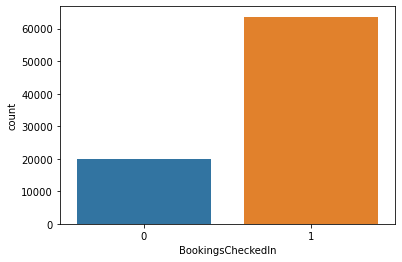

In [54]:
sns.countplot(x=df.BookingsCheckedIn)

for further analysis we will chek for booking who has been cheked in

In [55]:
df = df[(df.BookingsCheckedIn==1)]

Text(0.5, 1.0, 'COUNT OF DISTRIBUTION CHANNEL FOR BOOKING CHEKED IN')

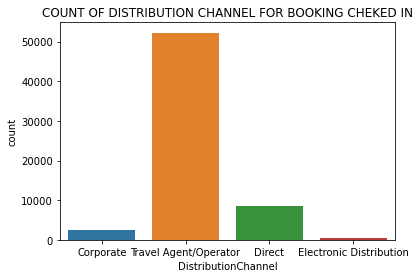

In [56]:
sns.countplot(x=df.DistributionChannel)
plt.title('COUNT OF DISTRIBUTION CHANNEL FOR BOOKING CHEKED IN')


from the above result we can see that we have to take some actions for corporate and electronic distribution category so they can increase their rate of cheked in hotel.

Text(0.5, 1.0, 'TOP 10 NATIONALITIS FOR BOOKING HOTEL')

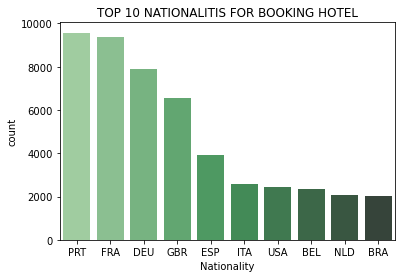

In [57]:
sns.countplot(x=df.Nationality, data =df, palette='Greens_d', order=df.Nationality.value_counts().iloc[0:10].index)
plt.title('TOP 10 NATIONALITIS FOR BOOKING HOTEL')


FROM result we can see that PRT nationality peoples has high rate for booking cheked in and NLD and BEL has low rate we have to give offers to peoples are from BRA and NLD so they can increase their rate for booking cheked in

Text(0.5, 1.0, 'AGEWISE DISTRIBUTION OF CHEKED IN BOOKINGS')

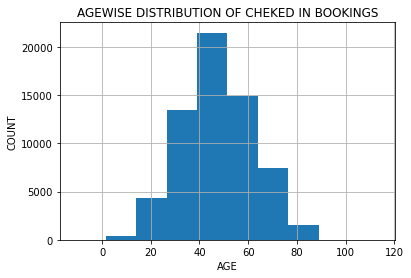

In [58]:
df.Age.hist()
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.title('AGEWISE DISTRIBUTION OF CHEKED IN BOOKINGS')


as we can see between age of 40 to 60 peoples mostly cheked in so for increasing business we have to focus on peoples have age betn 25-65 mostly

Text(0.5, 1.0, 'Count of cheked in people whe are interested in alcohol mini bar')

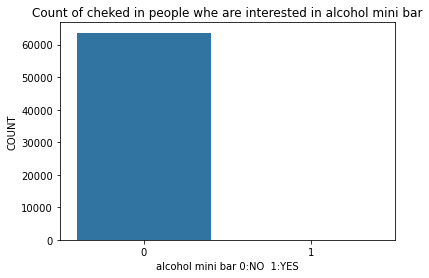

In [59]:
sns.countplot(x=df.SRNoAlcoholInMiniBar)
plt.xlabel('alcohol mini bar 0:NO  1:YES')
plt.ylabel('COUNT')
plt.title('Count of cheked in people whe are interested in alcohol mini bar')


As peoples are not interested in alcohol mini bar

Text(0.5, 1.0, 'Count of cheked in people whe are interested iN bath tub')

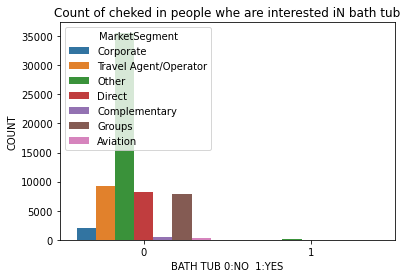

In [60]:
sns.countplot(data=df, x='SRBathtub', hue='MarketSegment')
plt.xlabel('BATH TUB 0:NO  1:YES')
plt.ylabel('COUNT')
plt.title('Count of cheked in people whe are interested iN bath tub')


<AxesSubplot:xlabel='LodgingRevenue', ylabel='MarketSegment'>

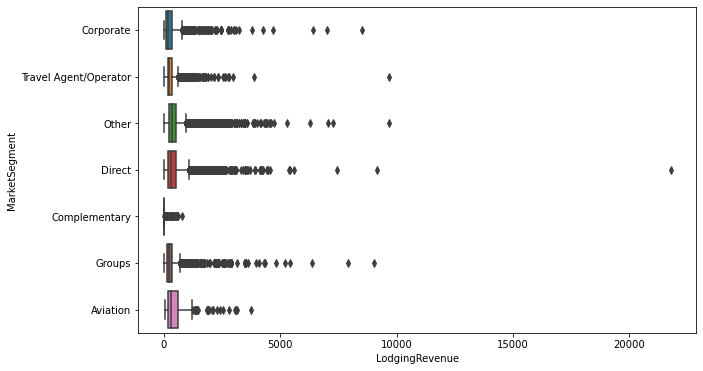

In [61]:
fig = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='LodgingRevenue', y = 'MarketSegment')

lodging revenue is varying too much with respect to every marketsegment as outliers are present in lodging revenue

3. Host/Deploy the results using any hosting service you want (streamlit/flask)



In [64]:
feature = [22, 122, 123, 134, 234, 1, 2, 2,2,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(feature)
	# re-arranging the list as per data set
feature_list = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'PersonsNights', 'RoomNights', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']
	
model.predict(np.array(feature).reshape(1,-1))


[22, 122, 123, 134, 234, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)